# Embedding from Scratch

This notebook focuses on traditional embedding methods and implementing one by ourselves from scratch.

## What Are Embeddings?

Processing text for NLP tasks requires us to have a numeric representation of each word. Most embedding method comes down to turning a "word" (or token) into a "vector". The methods of this goal are what makes embedding techniques different from each other. A high-quality embedding gives the program or neural network a better idea of what each token means. 

Embedding is not only for text, they can be applied to images, audio, or even graph data. In a general sense, embedding is the process of converting data into vectors. Of course, the embeddings and the emebedding methods of each modality is different and unique. Here, when mentioning embeddings, I am referring to the embedding of text.

An overview of different methods can be viewed here:


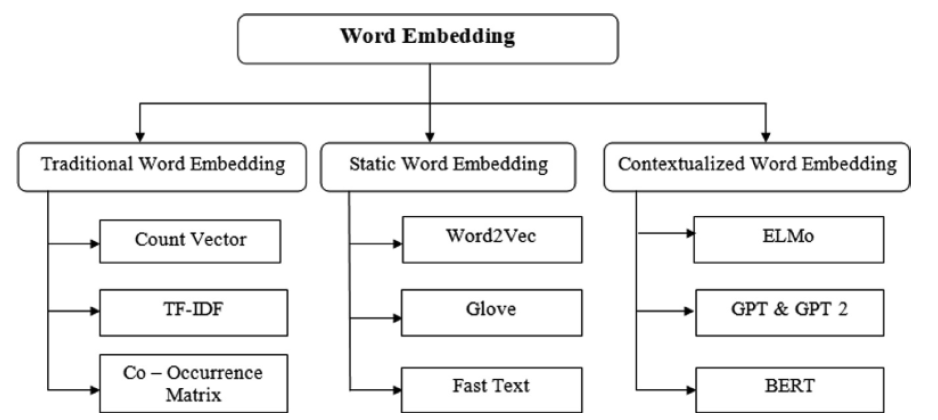

*Figure 1: Overview of different word embedding techniques. (Selva and Kanniga, 2021)*


So how can we evaluate an embedding technique? In other words, what makes an embedding ideal?
- **Quality of Semantic Representation**: Embeddings must capture the semantic relationships between words. Words with similar meanings should be placed close in the vector space andun
related words must be set apart. The vectors of "cat" and "dog" must be more similar that "dog" and "barrel". 
- **Dimensionality Efficiency**: How big must the the embedding vectors be? 15, 50, 300? Striking the right balance is key. Smaller vectors (lower dimensions) are more efficient to keep in memory or to process, while bigger vectors (higher dimensions) can capture intricate relationships, but are also prone to overfitting. For reference, GPT-2 model family has an embedding size of at least 768. 

***NOTE***: When reading about embeddings you may come across "static" vs. "dynamic/contextualized" word embeddings. Static embeddings have a fixed representation for each word, regarless of the context it appears in. For example, the word "tear" has very different meanings in "Tears felt down from her eyes" or "tearing a page out", and that dynamic word embeddings change this representation based on the context of the word. 

## Traditional Embedding Techniques
Almost every embedding technique relies on a corpus of text data to extract the relationship of the word. Previously, word embedding methods relied on statistic methods. These methods are based on the co-occurance of words in a text: words that often appear together must have a closer relationship than words that never appear together. For us in the modern day who know how embeddings can be more sophisticated, this doesn't seem a reliable approach. But to get an idea, let's check out one of these traditional embedding methods in practice:

### TF-IDF (Term Frequency-Inverse Document Frequency):
The idea of TF-IDF is to calculate the importance of a word in a document by considering two factors[1]:
1. **Term-Frequency (TF)**: How frequent a term appears in a document. A higher TF shows that a term is more important to the document.
2. **Inverse Document Frequency (IDF)**: How rare a term is across documents. This is based on the assumption that terms that appear in many of the documents are less important than terms that are unique to fewer documents. 

$$
\text{tf}(t,d) = \begin{cases}
- 1 + \log_e(f_{t,d}) & \text{if } f_{t,d} > 0 \\
- 0 & \text{if } f_{t,d} = 0
\end{cases}
$$
where $f_{t,d}$ is the raw frequency of term $t$ in document $d$


$$
\text{idf}(t,\mathcal{D}) = \log\left(\frac{N + 1}{\text{df}(t) + 1}\right) + 1
$$
where:

$t$ is a term in the vocabulary
$\mathcal{D}$ is the corpus of documents
$N$ is the total number of documents in $\mathcal{D}$
$\text{df}(t)$ is the document frequency of term $t$


Now let's start use TF-IDF using the [TinyShakespeare](https://github.com/karpathy/char-rnn/blob/master/data/tinyshakespeare/input.txt) dataset.

In [1]:
# load the dataset
with open("tinyshakespeare.txt", "r") as file:
    corpus = file.read()

print(f"Text corpus includes {len(corpus.split())} words.")

# to simulate multiple documents, we chunk up the corpus into 10 pieces
N = len(corpus) // 10
documents = [corpus[i:i+N] for i in range(0, len(corpus), N)]

documents = documents[:-1] #last document is residue
# now we have N documents from the corpus

Text corpus includes 202651 words.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(documents)
words = vectorizer.get_feature_names_out()

print(f"Word count: {len(words)} e.g.: {words[:10]}")
print(f"Embedding shape: {embeddings.shape}")

Word count: 11446 e.g.: ['abandon' 'abase' 'abate' 'abated' 'abbey' 'abbot' 'abed' 'abel' 'abet'
 'abhor']
Embedding shape: (10, 11446)


let's now visualize the embeddings in 2d space.

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings.T)

In [117]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'x': emb_2d[:, 0],
    'y': emb_2d[:, 1],
    'word': words
})

# Calculate distance from origin for color
df_plot['distance'] = np.sqrt(df_plot['x']**2 + df_plot['y']**2)

# Randomly sample 1000 points
sample_size = min(1500, len(df_plot))
df_sample = df_plot.sample(n=sample_size)

# Create the figure using graph_objects
fig = go.Figure(data=[
    go.Scatter(
        x=df_sample['x'],
        y=df_sample['y'],
        mode='markers+text',  # Explicitly set mode to show both markers and text
        text=df_sample['word'],
        textposition='top center',
        textfont=dict(
            color='rgba(0,0,0,0.5)'  # Semi-transparent black text
        ),
        marker=dict(
            size=6,
            opacity=0.7,
            color=df_sample['distance'],
            colorscale='plasma',
            showscale=False  # Hide the color scale
        ),
        hovertemplate='x: %{x:.2f}<br>y: %{y:.2f}<br>word: %{text}<extra></extra>'
    )
])

# Basic layout
fig.update_layout(
    coloraxis_showscale=False,
    width=800,
    height=600, 
    showlegend=False,
    xaxis_title=None,
    yaxis_title=None,
    margin=dict(l=30, r=30, t=30, b=30),
    paper_bgcolor='white',
    )

# Show in notebook
fig.show()

# Save to HTML
fig.write_html(
    "tfidf-emb.html",
    include_plotlyjs='cdn',
    full_html=True
)

In [91]:
# use plotly to visualize the embeddings
import plotly.express as px
import pandas as pd

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'x': emb_2d[:, 0],
    'y': emb_2d[:, 1],
    'word': words
})

# Create scatter plot with text labels for all points
fig = px.scatter(
    df_plot,
    x='x',
    y='y',
    text='word',  # Show text labels for all points
    # hover_data=['word'],
    # color=np.sqrt(df_plot['x']**2 + df_plot['y']**2), # Use distance from origin for color
    # color_continuous_scale='plasma'  # Use plasma colorscale
)

# # Update traces to set text position and opacity
# fig.update_traces(
#     marker=dict(size=8, opacity=0.8),  # Increased opacity for dots
#     textposition='top center',
#     textfont=dict(size=10, color='black'),  # Increased text size and color,
#     hovertemplate='x: %{x:.2f}<br>y: %{y:.2f}<br>word: %{text}<extra></extra>' # Show x, y and word
# )

# fig.update_layout(
#     coloraxis_showscale=False,
#     width=800,
#     height=600, 
#     showlegend=False,
#     xaxis_title=None,
#     yaxis_title=None,
#     margin=dict(l=30, r=30, t=30, b=30),
#     paper_bgcolor='white',
#     )

# # Update text opacity through layout annotations
# for trace in fig.data:
#     if trace.text is not None:  # Only update traces with text
#         trace.textfont.color = 'rgba(0,0,0,0.2)'  # Black with 0.3 opacity

fig.show()

import plotly.io as pio 
pio.write_html(
    fig,
    file='tfidf-emb.html',
    auto_open=True,
    include_plotlyjs=True,
    full_html=True
)

# Save the plotly figure as HTML with interactive features enabled
# fig.write_html("tfidf-emb.html",
#                include_plotlyjs='cdn',
#                include_mathjax=False,
#                full_html=True,
#                auto_play=False,      
#                config={'scrollZoom': True,
#                       'displayModeBar': True,
#                       'responsive':True}
#                 )

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
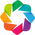

In [50]:
import pandas as pd 
import holoviews as hv
hv.extension('bokeh')

df = pd.DataFrame({
    'x': emb_2d[:, 0],
    'y': emb_2d[:, 1],
    'word': list(words)
})

# sample of words we are interested in
special_words = ['dog', 'cat', 'animal', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
# show only 200 words that are not special, otherwhise the plot would be too dense
mask = df['word'].isin(special_words)
non_special_df = df[~mask].sample(n=200, random_state=42)
special_df = df[mask]
df = pd.concat([special_df, non_special_df])

# show special words in red
df['color'] = 'gray'
df.loc[df['word'].isin(special_words), 'color'] = 'red'

df['size'] = 5  
df.loc[df['word'].isin(special_words), 'size'] = 15

# add label color column
df['label_color'] = 'gray'
df.loc[df['word'].isin(special_words), 'label_color'] = 'red'

points = hv.Points(df, kdims=['x', 'y'], vdims=['word', 'color', 'size', 'label_color'])

# add labels and customize
labels = hv.Labels(points, ['x', 'y'], ['word', 'label_color'])

# Create plot with separate options for Points and Labels
points_opts = hv.opts.Points(
    width=800, height=600,
    tools=['hover', 'box_zoom', 'wheel_zoom', 'pan', 'reset'],
    alpha=0.3,  # More transparent for regular words
    color='color',
    size='size'
)

labels_opts = hv.opts.Labels(
    text_font_size='8pt',
    text_color='label_color'
)

plot = (points.opts(points_opts) * labels.opts(labels_opts)).opts(
    xlabel='Component 1', 
    ylabel='Component 2'
)

# Save the plot
hv.save(plot, 'tf-idf-embeddings.html')


In [52]:
plot

:Overlay
   .Points.I :Points   [x,y]   (word,color,size,label_color)
   .Labels.I :Labels   [x,y]   (word,label_color)

Because TF-IDF is based on the occurance frequency of terms in the document, it doesn't hold any semantic meanings. Vectors that are similar to each other are irrelevant in meaning. And words that are semanticly close, like numbers from one to ten, have no relationship in the vector space. The inability of TF-IDF and similar approaches is what makes them unsuitable for many NLP tasks. However, the simplicity makes these methods useful in applications such as information retreival, keyword extraction, and basic text analysis. You can read about some of these methods in [2].

## word2vec
Another approach that is less traditional than TF-IDF and is deep-learning based. word2vec, as can be assumed by the name, is a network that aims to convert words into embedding vectors. It achieves this by defining a side goal, something to optimize the network for. For example, in CBOW (continous bag of words), the word2vec network is trained to predict a missing word when its given the neighbors of that word as input. The intuition is that you can infer the embeddings of a word given the words around it. 

The word2vec architecture is pretty simple: one hidden layer that we extract the embeddings from, and one output layer which predicts the probabilities of all words in the vocabulary. On the surface, the network is trained to predict the right missing word given its neighbors, but in reality, this is an excuse to train the hidden layer of the network and find the right embeddings for each word. After the network is trained, the last layer can be tossed out the window because the embeddings are what we're looking for.  

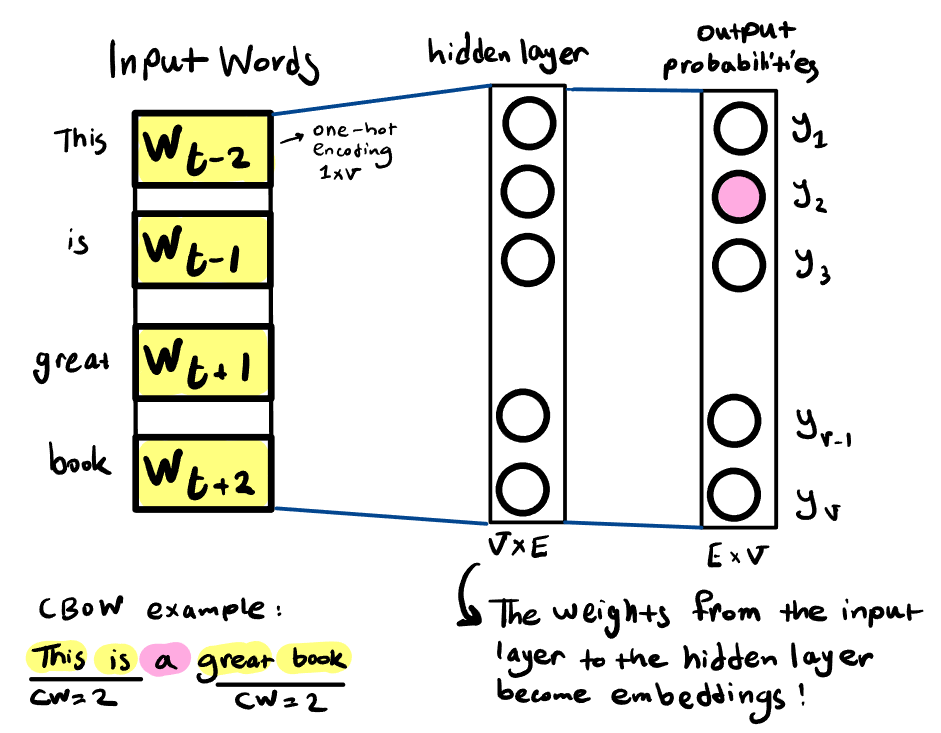

*Figure 2: word2vec in a CBOW example*

Aside from CBOW, another variant is Skipgram which works completely the opposite: it aims to predict the neighbors, given a particular word as input.
Let's see what happens in the case of a CBOW word2vec: after choosing a context window (e.g. 2 in the image above), we get the two words that appear before and two words after a particular word. The four words are encoded as one-hot vectors and passed through the hidden layer. The hidden layer has no activation function (actually it does, and it's linear activation function so it outputs anything that it gets as input). The outputs of the hidden layer are aggregated (e.g. using a lambda mean funcion) and then fed to the final layer which, by using Softmax, predicts a probability for each possible word. The one with the highest probability is considered the output of the network. 

As mentioned before the hidden layer holds the embeddings. It has a shape of *Vocabulary size x Embedding size* and as we give a one-hot vector of a word to the network, that specific `1` triggers the embeddings of that word to be passed to the next layers. You can see a cool and simple implementation of the word2vec network in [3].

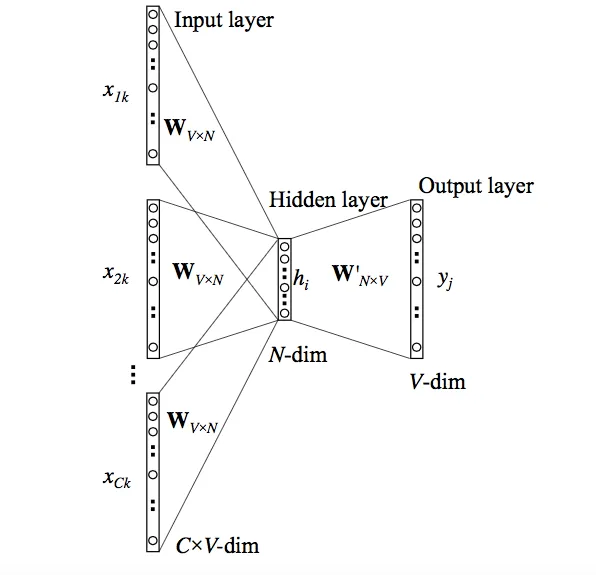

Since the network relies on the relationship between words in a context, and not on the occurance or co-occurance of words as in TF-IDF, it is able to capture **Semantics Relationships** between the words. What does this mean? Words that have closer meaning, also have closer embeddings. Let's see word2vec embeddings in action, you can download the pretrained version from Google's official page [4]:

In [1]:
# let's load the pretrained embeddings and see how they look
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [2]:
print(f"The embedding size: {model.vector_size}")
print(f"The vocabulary size: {len(model)}")


The embedding size: 300
The vocabulary size: 3000000


In [3]:
# italy - rome + london = england
model.most_similar(positive=['london', 'italy'], negative=['rome'])

[('england', 0.5743448734283447),
 ('europe', 0.537047266960144),
 ('liverpool', 0.5141493678092957),
 ('chelsea', 0.5138063430786133),
 ('barcelona', 0.5128480792045593),
 ('birmingham', 0.5125836730003357),
 ('spain', 0.4980141520500183),
 ('sweden', 0.49154016375541687),
 ('leeds', 0.4871762692928314),
 ('holland', 0.4858900308609009)]

In [9]:
# the release of word2vec sparked conversations on social bias
model.most_similar(positive=['woman', 'doctor'], negative=['man'])

[('gynecologist', 0.7093892097473145),
 ('nurse', 0.6477287411689758),
 ('doctors', 0.6471460461616516),
 ('physician', 0.6438996195793152),
 ('pediatrician', 0.6249487996101379),
 ('nurse_practitioner', 0.6218312978744507),
 ('obstetrician', 0.6072013974189758),
 ('ob_gyn', 0.5986713171005249),
 ('midwife', 0.5927063226699829),
 ('dermatologist', 0.5739566683769226)]

The semantic relationships is a fun topic to study. You can explore the biases of society or the data, or explore how words have evolved overtime by utilizing older manuscripts. 

## BERT (Bidirectional encoder representations from transformers)

BERT is the Sopranos of the NLP world, it's old, but you find references to it in whatever you look for. It's a good idea to do yourself a favor and learn about BERT once and for all, as it is the source of many ideas and techniques when it comes to LLMs. Here's a good video to get started [5]
In summary, BERT is an encoder-only transformer model consisting of 4 main parts:
1. Tokenizer: chops up texts into sequences of integers
2. Embedding: the module that converts discrete tokens into vectors
3. Encoder: a stack of transformer blocks with self-attention 
4. Task head: when encoder is finished with the representations, this task-specific head handles them for token generation or classification tasks. 

BERT inspired from the Transformer architecture introduced in "Attention is all you need", to become an encoder-only transformer that is able to produce meaningful representations and is aimed to understand language. The idea was to pretrain BERT to understand landguage, and depending on specific problems we like it to solve, fine-tune it to learn about tasks. These specific tasks can be Q&A (question + passage -> answer), text summarization, classification, etc.

In the pretraining phase, BERT is trained to learn two tasks simultaneously:
1. Masked Language Modeling: is to predict masked words in a sentance (I [MASKED] this book before -> read)
2. Next Sentence Prediction: given two sentences, predict if A came before B or not. The special [SEP] token seperates the two sentences and the task is similar to binary classification.

Note the other special token, [CLS]. This special token helps with classification tasks. As the model processes input layer by layer, [CLS] becomes an aggregation of all the input tokens, which can later be used for classification purposes.

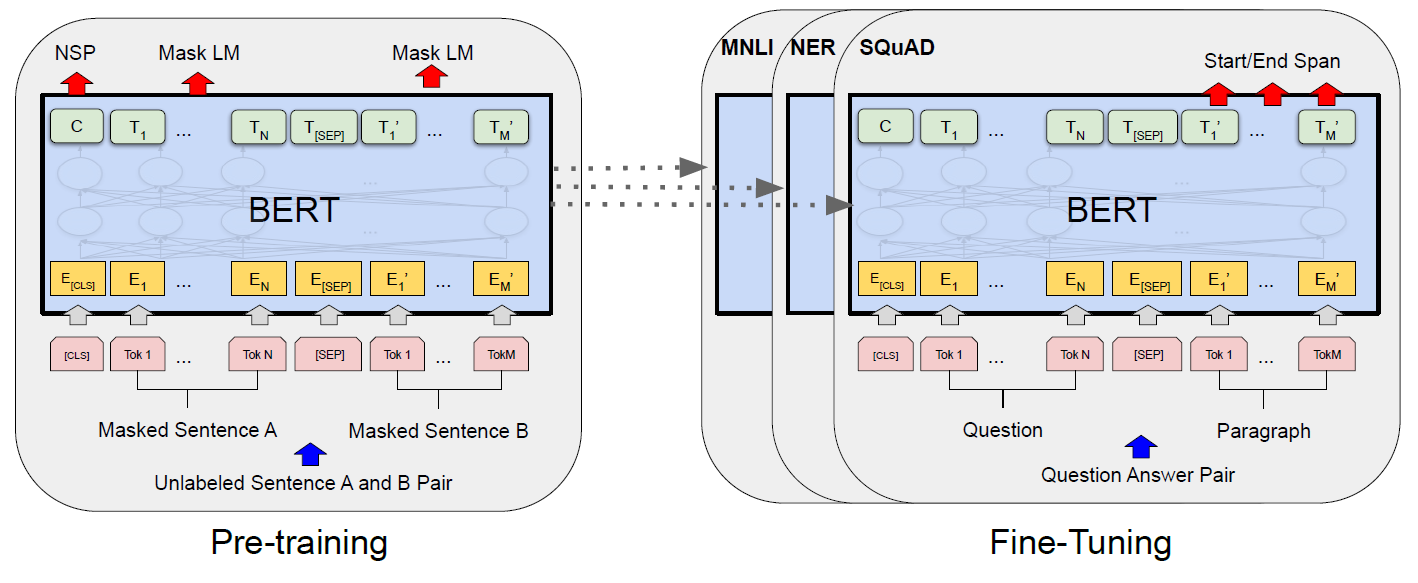
Figure 3: Overview of BERT architecture [6]

So why is BERT important? 

BERT is among the first instances of Transformer-based **contextualized, dynamic embeddings**. When given a sentence as input, the layers of the BERT model leverage self-attention and feed-forward mechanisms to update incorporate context from all other tokens in the sentence. The final output of each Transformer layer is a contextualized representation of the word which depending on the context, would be differnet. 

## Embeddings in Modern LLMs
Modern LLMs, such as the GPT family or the recent Deepseek model, use embeddings as a foundational component. In the context of Large Language Models, "embeddings" is a broad term. For the purpose of this article, we focus on "embeddings" as the module that transforms tokens into vector representations.

### Where deos the embedding fit into LLMs?
In transformer-based models, the term "embedding" can refer to both static embeddings and dynamic contextual representations:
1. **Static Embeddings** generated in the first layer and combine token embeddings (vectors representing tokens) with positional embeddings (vectors encoding token's position in the sequence, which we'll cover in a later notebook/article).
2. **Dynamic Contextual Representations**. As input tokens pass through the self-attention and feed-forward layers, their embeddings are updated to become contextual. These dynamic representations capture the meaning of tokens based on their surrounding context. For example, the word "bank" appears both as "river bank" and "bank robbery", and while the **token embedding** of the word bank is the same in both cases, the transformations it goes through in the layers of the network account for the context of which the word "bank" appears in.

So where do we draw the line?

**What should we actually call embeddings?**

I personally don't find it exotic to call the latent representations of the later LLM layers as "embeddings", it introduces unnecessary confusion. This naming is only enforced by the differentiation of "dynamic" and "static" embeddings that is made in many courses and articles, and the only way for an embedding to be "dynamic" and "context-aware", is that it's processed through the layers of the network. So I prefer to reserve the term "embedding" for the first module of the LLM architecture: **The Embedding layer**.

# <img src="llm-overview.png" alt="llm-overview.png" width="500" style="display: block; margin: 0 auto;"/>


### LLM Embeddings are Trained
LLM embeddings are optimized during the training process. Borrowing from Sebastian Raschka's **Build a Large Language Model (From Scratch)**[7], " While we can use pretrained models such as Word2Vec to generate embeddings for machine learning models, LLMs commonly produce their own embeddings that are part of the input layer and are updated during training. The advantage of optimizing the embeddings as part of the LLM training instead of using Word2Vec is that the embeddings are optimized to the specific task and data at hand."

### torch.nn.Embedding
The embedding layer in LLMs works as a look-up table. Given a list of indices (token ids) it returns their embeddings. [7] shows this concept pretty well. 
# <img src="embeddings_as_lookup.png" alt="embeddings_as_lookup.png" width="500" style="display: block; margin: 0 auto;"/>

The practical implementation of an embedding layer in PyTorch is done with `torch.nn.Embedding` which acts as a simple look-up table. There is nothing more special about this layer than a simple Linear layer, rather than it allows us to get output with indices as input rather than one-hot encodings. The Embedding layer is simply a Linear layer that works with indices. 
# <img src="embedding_as_linear.png" alt="embedding_as_linear.png" width="500" style="display: block; margin: 0 auto;"/>

This notebook by Sebastian Raschka explains the Embedding layer in depth [8]. 

Now let's work with the embedding of a model and see some visuals!


# Embeddings in Action: DeepSeek-R1-Distill-Qwen-1.5B
Let's disect the embeddings of the distilled version of DeepSeek-R1 in the Qwen model. Some parts of the following code is inspired by [9].

In [4]:
import torch
from transformers import AutoTokenizer, AutoModel

d:\codebox\llm-mechanics\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
tokenizer_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
model_name = tokenizer_name

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Load the pre-trained model
model = AutoModel.from_pretrained(model_name)

# Extract the embeddings layer
embeddings = model.get_input_embeddings()

# Print out the embeddings
print(f"Extracted Embeddings Layer for {model_name}: {embeddings}")

# Save the embeddings layer
torch.save(embeddings.state_dict(), "embeddings_qwen.pth")

Extracted Embeddings Layer for deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B: Embedding(151936, 1536)


Now let's load the embedding layer and work with it. The goal of seperating the embedding from the other parts of the model is to do the whole thing more efficiently without using the rest of the model.

In [1]:
vocab_size = 151936
dimensions = 1536
embeddings_filename = "embeddings_qwen.pth"

In [2]:
import torch.nn as nn

class EmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(EmbeddingModel, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

    def forward(self, input_ids):
        return self.embedding(input_ids)

In [7]:
# Initialize the custom embedding model
model = EmbeddingModel(vocab_size, dimensions)

# Load the saved embeddings from the file
saved_embeddings = torch.load(embeddings_filename)

# Ensure the 'weight' key exists in the saved embeddings dictionary
if 'weight' not in saved_embeddings:
    raise KeyError("The saved embeddings file does not contain 'weight' key.")

embeddings_tensor = saved_embeddings['weight']

# Check if the dimensions match
if embeddings_tensor.size() != (vocab_size, dimensions):
    raise ValueError(f"The dimensions of the loaded embeddings do not match the model's expected dimensions ({vocab_size}, {dimensions}).")

# Assign the extracted embeddings tensor to the model's embedding layer
model.embedding.weight.data = embeddings_tensor

# put the model in eval mode
model.eval()

C:\Users\Nik.Computer\AppData\Local\Temp\ipykernel_15680\2711500236.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_embeddings = torch.load(embeddings_filename)


EmbeddingModel(
  (embedding): Embedding(151936, 1536)
)

### Now we have the embedding model loaded!
Let's see how a string is tokenized and how the embeddings look like

In [8]:
from prettytable import PrettyTable

def prompt_to_embeddings(prompt:str):
    # tokenize the input text
    tokens = tokenizer(prompt, return_tensors="pt")
    input_ids = tokens['input_ids']

    # make a forward pass
    outputs = model(input_ids)

    # directly use the embeddings layer to get embeddings for the input_ids
    embeddings = outputs

    # print each token
    token_id_list = tokenizer.encode(prompt, add_special_tokens=True)
    token_str = [tokenizer.decode(t_id, skip_special_tokens=True) for t_id in token_id_list]

    return token_id_list, embeddings, token_str


def print_tokens_and_embeddings(prompt:str):
    table = PrettyTable()

    token_id_list, embeddings, token_str = prompt_to_embeddings(prompt)

    headers = ["token_id", "token", "Embedding Vector"]
    token_emb_table = []
    for i, (t_id, t_str) in enumerate(zip(token_id_list, token_str)):
        embedding_values = embeddings[0][i].tolist()
        embedding_str = f"{embedding_values[0]:.6f}, {embedding_values[1]:.6f}, {embedding_values[2]:.6f} ... {embedding_values[-1]:.6f}"
        t_str = t_str.replace(" ",  "#")
        token_emb_table.append([t_id, t_str, embedding_str])

    table.title = "Token Embeddings"
    table.field_names = headers
    table.add_rows(token_emb_table)
    print(table)


In [9]:
print_tokens_and_embeddings("HTML coders are not considered programmers")

+------------------------------------------------------------------------+
|                            Token Embeddings                            |
+----------+--------------+----------------------------------------------+
| token_id |    token     |               Embedding Vector               |
+----------+--------------+----------------------------------------------+
|  151646  |              | -0.027466, 0.002899, -0.005188 ... 0.021606  |
|   5835   |     HTML     | -0.018555, 0.000912, 0.010986 ... -0.015991  |
|  20329   |     #cod     | -0.026978, -0.012939, 0.021362 ... 0.042725  |
|   388    |     ers      | -0.012085, 0.001244, -0.069336 ... -0.001213 |
|   525    |     #are     | -0.001785, -0.008789, 0.006195 ... -0.016235 |
|   537    |     #not     |  0.016357, -0.039062, 0.045898 ... 0.001686  |
|   6509   | #considered  | -0.000721, -0.021118, 0.027710 ... -0.051270 |
|  54846   | #programmers | -0.047852, 0.057861, -0.069336 ... 0.005280  |
+----------+-------------

As you can see, the prompt is chopped into tokens. Each tokenizer has a different approach of breaking strings down into meaningful pieces and sometimes it can be surprising too! (coders = cod + ers)
Also, I have replaced the whitespace " " with # in tokens for easier understanding.

### Visualize the embeddings
Now let's run a visualization experiment. For a given prompt, I will find `n` closes embeddings to each token and visualize them in a 2d space. 

In [11]:
def find_similar_embeddings(target_embedding, n=10):
    """
    Find the n most similar embeddings to the target embedding using cosine similarity
    
    Args:
        target_embedding: The embedding vector to compare against
        n: Number of similar embeddings to return (default 3)
    
    Returns:
        List of tuples containing (word, similarity_score) sorted by similarity
    """
    # Convert target to tensor if not already
    if not isinstance(target_embedding, torch.Tensor):
        target_embedding = torch.tensor(target_embedding)
        
    # Get all embeddings from the model
    all_embeddings = model.embedding.weight
    
    # Compute cosine similarity between target and all embeddings
    similarities = torch.nn.functional.cosine_similarity(
        target_embedding.unsqueeze(0), 
        all_embeddings
    )
    
    # Get top n similar embeddings
    top_n_similarities, top_n_indices = torch.topk(similarities, n)
    
    # Convert to word-similarity pairs
    results = []
    for idx, score in zip(top_n_indices, top_n_similarities):
        word = tokenizer.decode(idx)
        results.append((word, score.item()))
        
    return results


In [104]:
token_id_list, prompt_embeddings, prompt_token_str = prompt_to_embeddings("""bridge sunset melody shadow river mountain blanket forest silence breeze thunder golden mirror whisper lantern crystal horizon meadow village ocean journey echo twilight compass harvest spark canyon autumn shelter raindrop sunrise valley maple summit canyon flicker gentle sapphire feather rustic drift orchard skyline ember velvet tranquil misty cobblestone harbor ripple radiant willow solstice""")

tokens_and_neighbors = {}
for i in range(1, len(prompt_embeddings[0])):
    token_results = find_similar_embeddings(prompt_embeddings[0][i], n=20)
    similar_embs = []
    for word, score in token_results:
        if word.strip().lower() != prompt_token_str[i].strip().lower():
            similar_embs.append(word)
    tokens_and_neighbors[prompt_token_str[i]] = similar_embs

In [105]:
all_token_embeddings = {}

# Process each token and its neighbors
for token, neighbors in tokens_and_neighbors.items():
    # Get embedding for the original token
    token_id, token_emb, _ = prompt_to_embeddings(token)
    all_token_embeddings[token] = token_emb[0][1]

    # Get embeddings for each neighbor token
    for neighbor in neighbors:
        # Get embedding
        neighbor_id, neighbor_emb, _ = prompt_to_embeddings(neighbor)
        all_token_embeddings[neighbor] = neighbor_emb[0][1]

In [14]:
import networkx as nx
import plotly.graph_objects as go
import random

In [39]:
# Create the graph
G = nx.Graph()

# Add edges from tokens to their neighbors
for token, neighbors in tokens_and_neighbors.items():
    for neighbor in neighbors:
        G.add_edge(token, neighbor)

# Generate positions using spring layout with optimized parameters for atlas-like spread
k = 1
iterations = 300
pos = nx.spring_layout(G, k=k, iterations=iterations)  # Increased k for more spread
# works on colab
# pos = nx.forceatlas2_layout(G, max_iter=36)

# Define visualization dimensions 
viz_width = 1500  # Increased for better spread
viz_height = 500 # Increased for better spread

# Extract edge coordinates and scale them
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    # Scale coordinates to fill the width/height
    x0, x1 = x0 * viz_width, x1 * viz_width  # Scale x coordinates
    y0, y1 = y0 * viz_height, y1 * viz_height # Scale y coordinates  
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Node coordinates and data - scale the positions
node_x = [pos[node][0] * viz_width for node in G.nodes()]
node_y = [pos[node][1] * viz_height for node in G.nodes()]
node_degrees = dict(G.degree())
# Assign colors using viridis colorscale
colors = []
components = list(nx.connected_components(G))

# Create a mapping of nodes to their colors
node_to_color = {}
node_opacities = []  # List to store opacity values
node_labels = []     # List to store node labels
hover_labels = []    # List to store hover labels
text_opacities = []  # List to store text opacities

# Assign component index to each node for colorscale mapping
node_component_indices = []
for node in G.nodes():
    # Find which component the node belongs to
    for i, component in enumerate(components):
        if node in component:
            node_component_indices.append(i)
            break
    
    # Set opacity and label based on whether it's a main token or neighbor
    if node in tokens_and_neighbors:  # Main token
        node_opacities.append(0.9)
        text_opacities.append(1.0)
        node_labels.append(node)
        hover_labels.append(node)
    else:  # Neighbor token
        node_opacities.append(0.6)
        text_opacities.append(0.0)  # Lower opacity for neighbor labels
        node_labels.append(node)  # Show label with lower opacity
        hover_labels.append(node)

node_sizes = [(degree + 5) * 1 for degree in node_degrees.values()]  # Increased node sizes

# Node trace with viridis colorscale
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_labels,  # Show all labels
    textposition="top center",
    textfont=dict(
        color=[f'rgba(0,0,0,{opacity})' for opacity in text_opacities]  # Set text opacity
    ),
    marker=dict(
        size=node_sizes,
        color=node_component_indices,
        colorscale='plasma',
        opacity=node_opacities,  # Use the conditional opacities
        line_width=0.5
    ),
    customdata=[[hover_labels[i], ' | '.join(G.neighbors(node))] for i, node in enumerate(G.nodes())],
    hovertemplate="<b>%{customdata[0]}</b><br>Similar tokens: %{customdata[1]}<extra></extra>",
    hoverlabel=dict(namelength=0)
)

# Edge trace with black edges
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='grey'),  # Set edge color to grey
    hoverinfo='none',
    mode='lines'
)

# Set up Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    width=1200,
                    height=400,
                    paper_bgcolor='white',
                    plot_bgcolor='white',
                    showlegend=False,
                    margin=dict(l=0, r=0, t=0, b=0),
                    xaxis=dict(
                        showgrid=False,
                        zeroline=False,
                        showticklabels=False,
                    ),
                    yaxis=dict(
                        showgrid=False,
                        zeroline=False,
                        showticklabels=False,
                        scaleanchor="x",
                        scaleratio=1
                    )
                ))
fig.show()

fig.write_html(r"token_visualization_sentence.html",
               include_plotlyjs=False,
               full_html=False,
               config={
                   'displayModeBar': False,
                   'responsive': True,
                   'scrollZoom': False,
               })


## Let's Wrap Up
Embeddings remain as one of the fundemental parts in natural language processing and modern LLMs. While the research in machine leanring and LLMs rapidly uncovers new methods and techniques, embeddings haven't seen much change in large language models. They are essential, easy to understand, and easy to work with. In this notebook I have covered the essentials of embeddings, and their evolution from traditional statistical methods into their use case in today's LLMs. 

[1] Vardhan, H. (2024, November 22). A Comprehensive Guide to Word Embeddings in NLP - Harsh Vardhan - Medium. Medium. https://medium.com/@harsh.vardhan7695/a-comprehensive-guide-to-word-embeddings-in-nlp-ee3f9e4663ed

[2] Turing. (2022, February 10). A Guide on Word embeddings in NLP. https://www.turing.com/kb/guide-on-word-embeddings-in-nlp

[3] Sarkar, D. (n.d.). Implementing deep learning methods and feature engineering for text data: The Continuous Bag of Words (CBOW) - KDNuggets. KDnuggets. https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html

[4] Google Code Archive - Long-term storage for Google Code Project Hosting. (n.d.). https://code.google.com/archive/p/word2vec/

[5] CodeEmporium. (2020, May 4). BERT Neural Network - EXPLAINED! [Video]. YouTube. https://www.youtube.com/watch?v=xI0HHN5XKDo

[6] Devlin, J., Chang, M., Lee, K., & Toutanova, K. (2018, October 11). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv.org. https://arxiv.org/abs/1810.04805

[7] Build a large language model (From scratch). (n.d.). Manning Publications. https://www.manning.com/books/build-a-large-language-model-from-scratch

[8] Rasbt. (n.d.). LLMs-from-scratch/ch02/03_bonus_embedding-vs-matmul at main · rasbt/LLMs-from-scratch. GitHub. https://github.com/rasbt/LLMs-from-scratch/tree/main/ch02/03_bonus_embedding-vs-matmul

[9] Chrishayuk. (n.d.). GitHub - chrishayuk/embeddings. https://github.com/chrishayuk/embeddings/tree/main